# SUPPORT_VECTOR_MACHINE

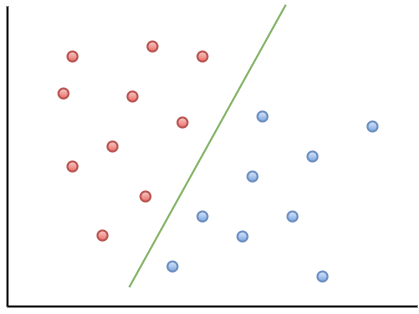

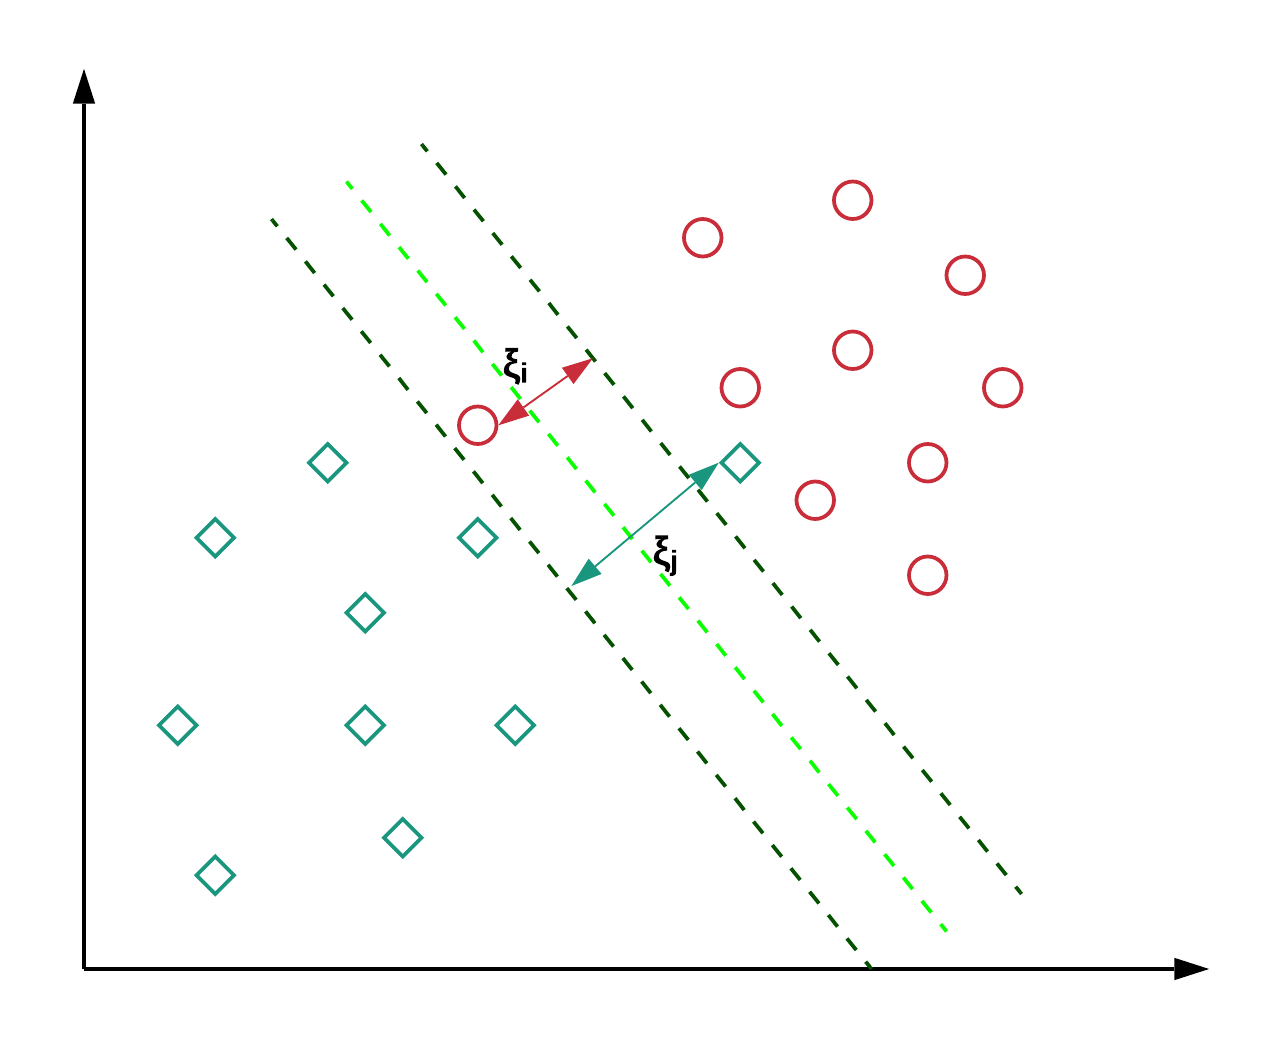

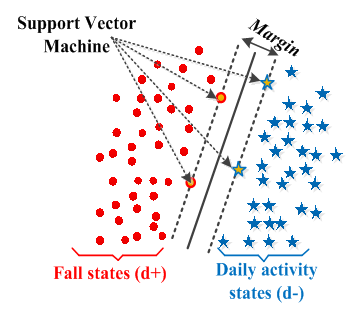

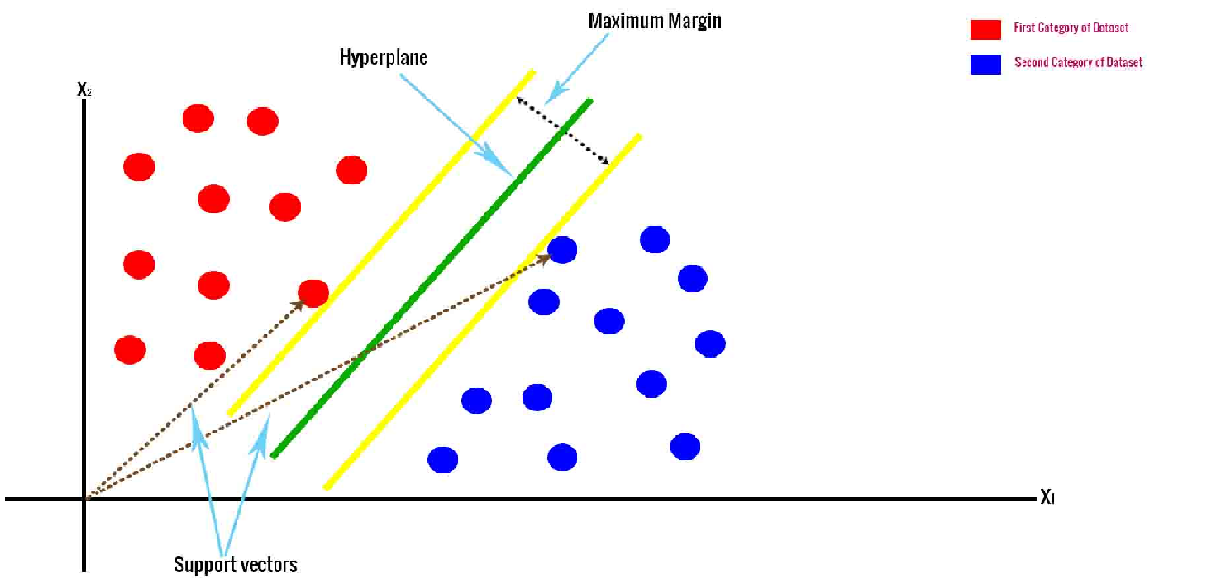

# HIGH GAMMA AND LOW GAMMA


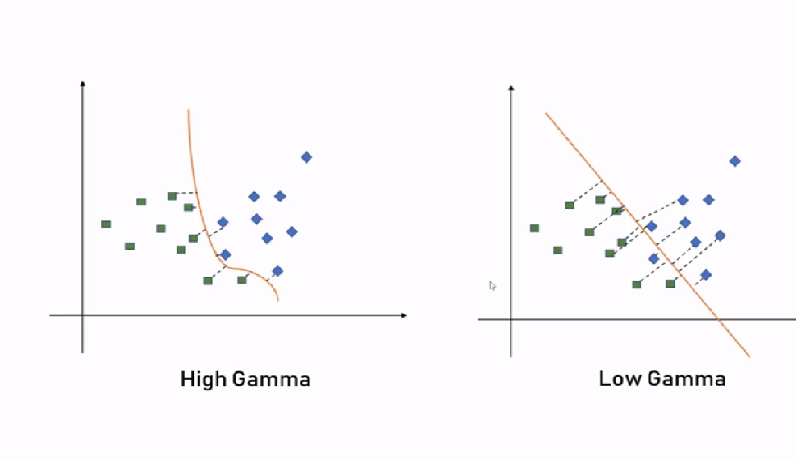

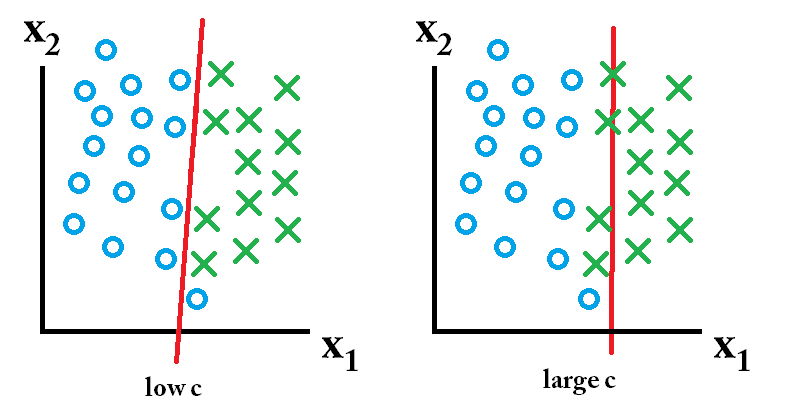

# REGULARIZATION (C)

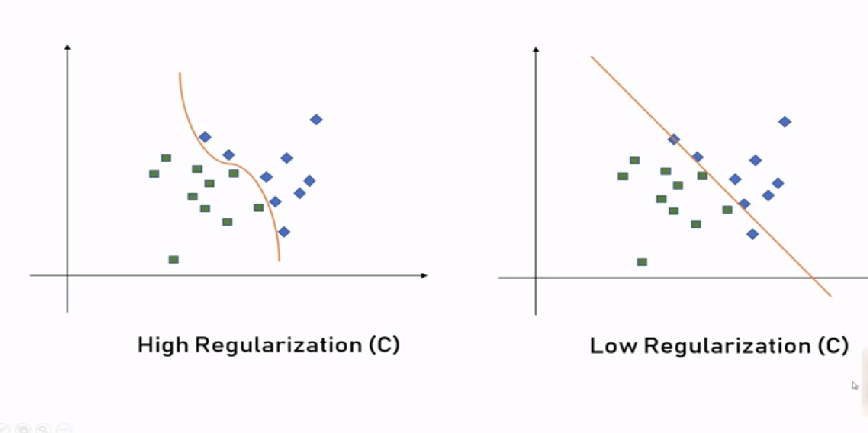

# KERNAL: WHICH HELP TO CONVERT LOW DIMENSION IN HIGH DIMENSION

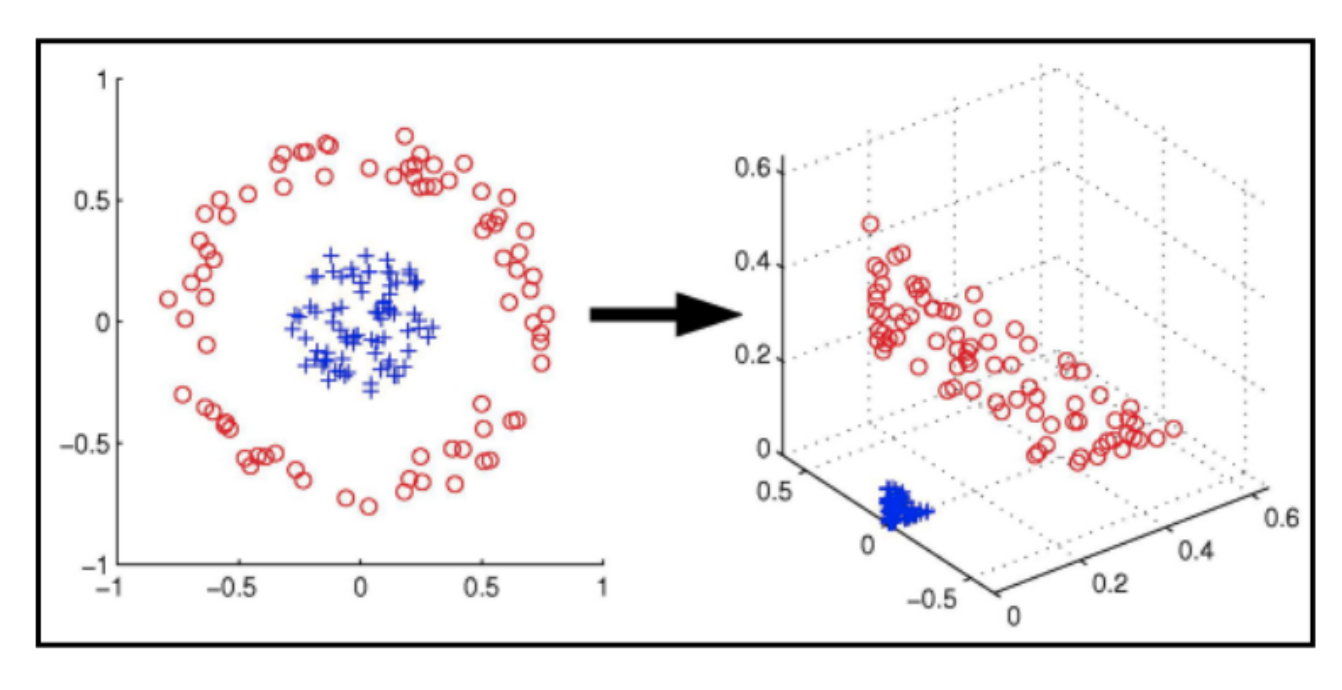

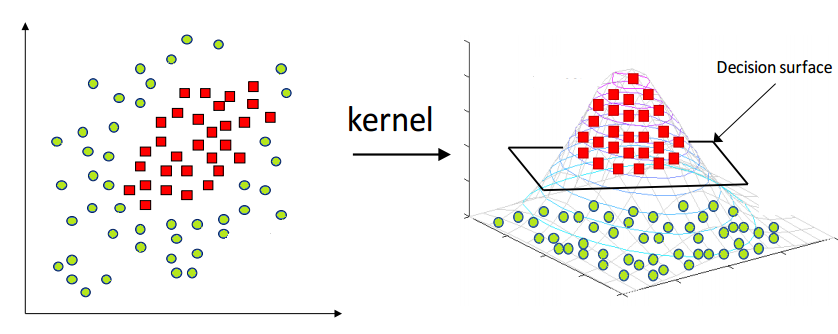

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


C:\Users\ABHI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\ABHI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


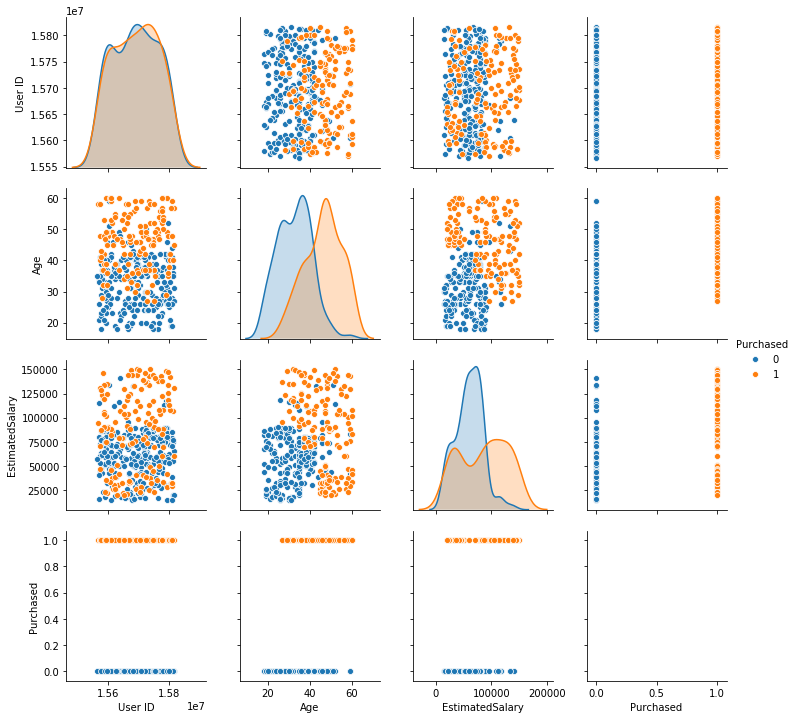

In [9]:
import seaborn as sn
sn.pairplot(data,hue = "Purchased")

In [10]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
x = data.iloc[:,[2,3]].values #data.iloc[:,2:4].values
y = data.iloc[:,4].values

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [32]:
# STANDARD SCALER

from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

C:\Users\ABHI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ABHI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ABHI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ABHI\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [33]:
len(x_train)

300

In [34]:
len(x_test)

100

In [35]:
x_train
x_test

array([[-0.54748976,  0.5130727 ],
       [ 0.15442019, -0.61825566],
       [-0.10879604,  0.14615539],
       [-0.54748976,  0.26846116],
       [-0.10879604, -0.61825566],
       [-0.81070599, -1.53554892],
       [-0.45975102, -1.68843113],
       [-0.0210573 ,  2.25592989],
       [-1.60035469, -0.0678797 ],
       [ 0.94406888, -0.83229075],
       [-0.54748976, -0.6488321 ],
       [-0.72296725, -0.46537345],
       [ 0.06668145, -0.46537345],
       [ 0.24215893,  0.20730828],
       [-1.4248772 ,  0.48249625],
       [-0.37201227,  1.43036596],
       [ 0.06668145,  0.20730828],
       [-1.51261594,  0.45191981],
       [ 1.64597884,  1.8278597 ],
       [-0.10879604, -1.47439603],
       [-0.10879604, -0.70998498],
       [ 0.94406888,  2.25592989],
       [ 0.41763642, -0.58767922],
       [ 0.94406888,  1.06344865],
       [-1.16166097, -1.29093738],
       [ 1.11954637,  2.16420057],
       [-0.72296725,  0.5130727 ],
       [-0.63522851,  0.2990376 ],
       [ 0.06668145,

In [89]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf",C = 200)
svm.fit(x_train,y_train)

SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [90]:
svm.score(x_test,y_test)

0.93

In [91]:
yp = svm.predict(x_test)
yp

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [92]:
svm.score(x_train,y_train)

0.9166666666666666

In [93]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,yp)
cm

array([[64,  4],
       [ 3, 29]], dtype=int64)

Text(33,0.5,'TRUTH')

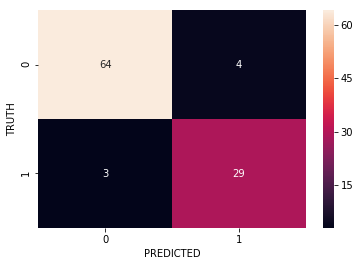

In [94]:
sn.heatmap(cm,annot = True)
plt.xlabel("PREDICTED")
plt.ylabel("TRUTH")